In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


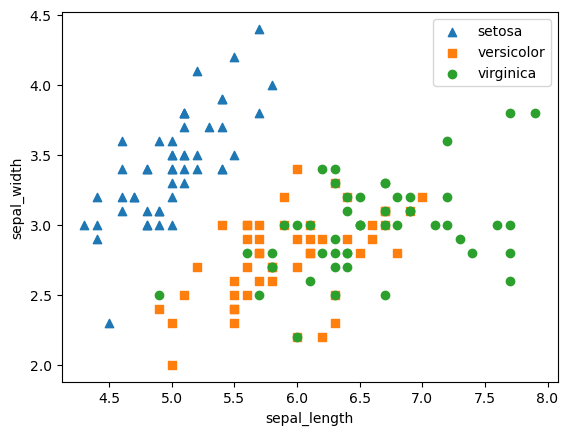

In [2]:
import matplotlib.pyplot as plt
markers = ['^', 's' ,'o']

# 원본 데이터의 2개 컬럼으로 표현

for i, marker in enumerate(markers):
    x_axis_data = iris_df[ iris_df['target']==i]['sepal length (cm)']
    y_axis_data = iris_df[ iris_df['target']==i]['sepal width (cm)']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

# pca 분석 > 성분 축소

## 원본 데이터 스케일링

In [7]:
from sklearn.preprocessing import StandardScaler
iris_caled = StandardScaler().fit_transform(iris_df.iloc[:,:-1])
iris_caled[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

## pca(n_components=2)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_caled)
iris_pca.shape

(150, 2)

In [9]:
pca_cols = ['pca_comp1', 'pca_comp2']

iris_pca_df = pd.DataFrame(data=iris_pca, columns=pca_cols)
iris_pca_df['target'] = iris.target
iris_pca_df.head()

,pca_comp1,pca_comp2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


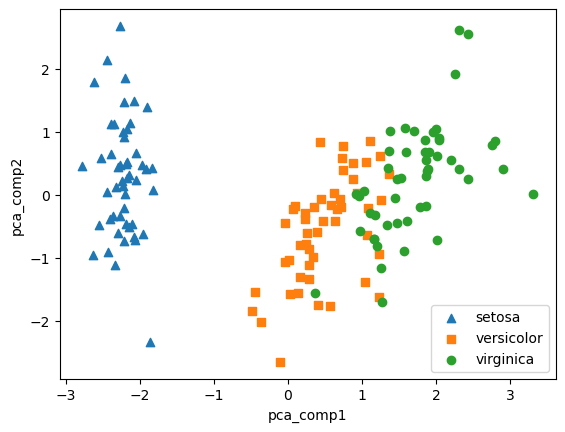

In [10]:
import matplotlib.pyplot as plt
markers = ['^', 's' ,'o']

# 4개 원본 데이터 >  2개 컬럼으로 압축 > 표현

for i, marker in enumerate(markers):
    x_axis_data = iris_pca_df[ iris_pca_df['target']==i]['pca_comp1']
    y_axis_data = iris_pca_df[ iris_pca_df['target']==i]['pca_comp2']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_comp1')
plt.ylabel('pca_comp2')
plt.show()

In [11]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])